In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
# paths
datos_g10_path = "https://raw.githubusercontent.com/apolineo11/PYEF/main/Cuadernos/Data/Datos_Probabilidad_Grupo_10.xlsx"
datos_g11_path = "https://raw.githubusercontent.com/apolineo11/PYEF/main/Cuadernos/Data/Datos_Probabilidad_Grupo_11.xlsx"


In [2]:
# leer los datos
datos_g10 = pd.read_excel(datos_g10_path)
datos_g11 = pd.read_excel(datos_g11_path, skiprows=1)

In [3]:
# limpieza datos
datos_g10.rename(columns={"ESTRATO DEL PREDIO DONDE VIVE":"ESTRATO",
                          "EDAD (AÑOS)":"EDAD",
                          "PROGRAMA ACADÉMICO":"PROGRAMA",
                          "NÚMERO DE MATRICULAS": "MATRICULAS",
                          "ESTATURA (CM)": "ESTATURA",
                          "PESO (KG)": "PESO"}, inplace=True)
datos_g11.rename(columns={"ESTRATO DEL PREDIO DONDE VIVE ":"ESTRATO",
                          "EDAD (AÑOS)":"EDAD",
                          "PROGRAMA ACADEMICO":"PROGRAMA",
                          "NUMERO DE MATRICULAS": "MATRICULAS",
                          "ESTATURA (CM)": "ESTATURA",
                          "PESO KG)": "PESO"}, inplace=True)
columns_df = ["ESTRATO", "EDAD", "PROGRAMA", "MATRICULAS", "ESTATURA", "PESO"]
datos_g10 = datos_g10[columns_df]
datos_g11 = datos_g11[columns_df]
df = pd.concat([datos_g10, datos_g11])
programa_dict = {"ADMINISTRACIÓN": "ADMINISTRACION", "ECONOMÍA":"ECONOMIA", "CONTADURÍA PÚBLICA":"CONTADURIA PUBLICA"}
df.replace({"PROGRAMA": programa_dict}, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.astype({"EDAD": "int32", "MATRICULAS":"int32", "ESTRATO":"int32", "PROGRAMA":"category"})
df["ESTRATO"] = df["ESTRATO"].astype("str").astype("category")
df["ESTRATO"] = df["ESTRATO"].cat.reorder_categories(["1", "2", "3", "4", "5", "6"], ordered=True)


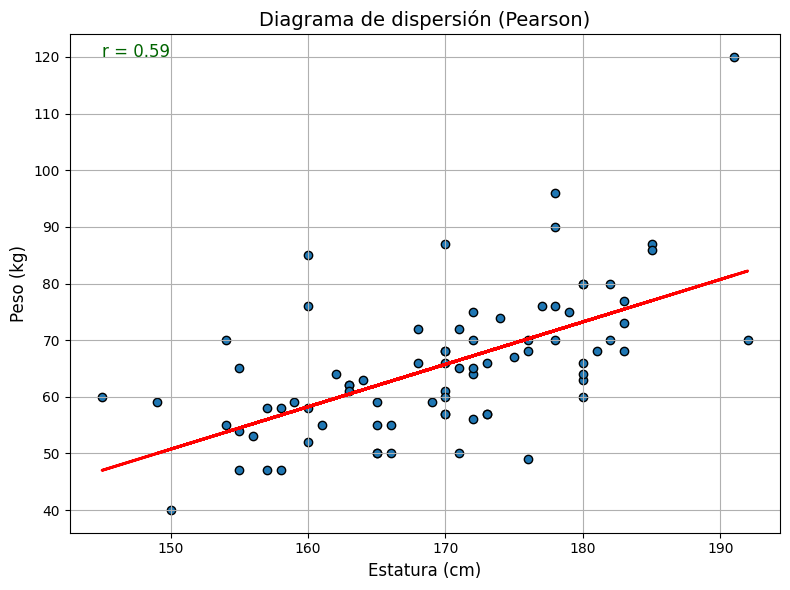

In [4]:
#########
# Pearson
# #######

# Calcular regresión lineal (pendiente m, intercepto b)
m, b = np.polyfit(df["ESTATURA"], df["PESO"], 1)
regression_line = m * df["ESTATURA"] + b

# Calcular coeficiente de correlación de Pearson
r, p_value = pearsonr(df["ESTATURA"], df["PESO"])

# scatter plot peso vs estatura
plt.figure(figsize=(8, 6))

# Crear scatter plot
plt.scatter(x=df["ESTATURA"], y=df["PESO"], edgecolors='k')

# Crear la linea de regresón
plt.plot(df["ESTATURA"], regression_line, color='red', linewidth=2)

# Personalización
plt.title('Diagrama de dispersión (Pearson)', fontsize=14)
plt.xlabel('Estatura (cm)', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)
plt.grid(True)
plt.text(min(df["ESTATURA"]), max(df["PESO"]), f"r = {r:.2f}", fontsize=12, color='darkgreen')

# Mostrar gráfico
plt.tight_layout()
plt.show()

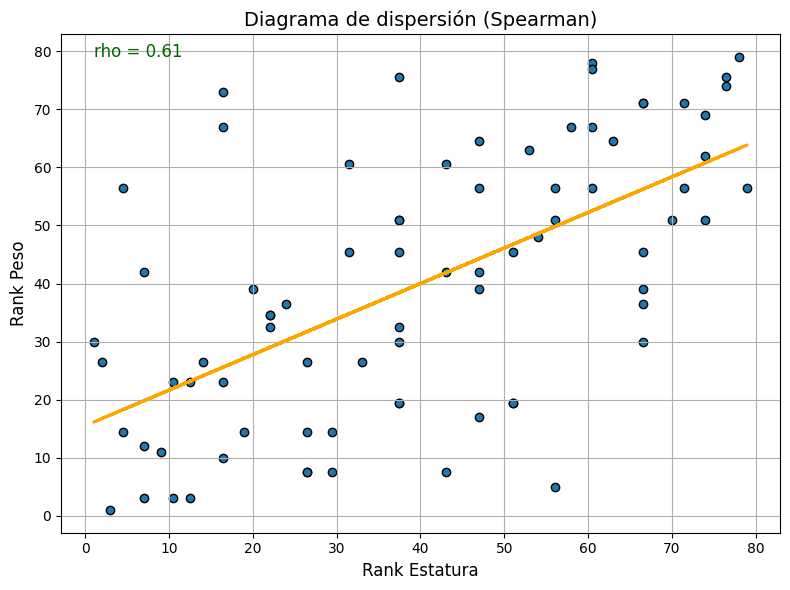

In [5]:
# Spearman
df["ESTATURA_RANK"] = df["ESTATURA"].rank(method="average")
df["PESO_RANK"] = df["PESO"].rank(method="average")
from scipy.stats import spearmanr
rho, p_value = spearmanr(df["ESTATURA_RANK"], df["PESO_RANK"])

# Calcular regresión lineal (pendiente m, intercepto b)
m, b = np.polyfit(df["ESTATURA_RANK"], df["PESO_RANK"], 1)
regression_line = m * df["ESTATURA_RANK"] + b

# scatter plot peso_rank vs estatura_rank
plt.figure(figsize=(8, 6))

# Crear scatter plot
plt.scatter(x=df["ESTATURA_RANK"], y=df["PESO_RANK"], edgecolors='k')
# Crear la linea de regresón
plt.plot(df["ESTATURA_RANK"], regression_line, color='orange', linewidth=2)


# Personalización
plt.title('Diagrama de dispersión (Spearman)', fontsize=14)
plt.xlabel('Rank Estatura', fontsize=12)
plt.ylabel('Rank Peso', fontsize=12)
plt.grid(True)
plt.text(min(df["ESTATURA_RANK"]), max(df["PESO_RANK"]), f"rho = {rho:.2f}", fontsize=12, color='darkgreen')

# Mostrar gráfico
plt.tight_layout()
plt.show()

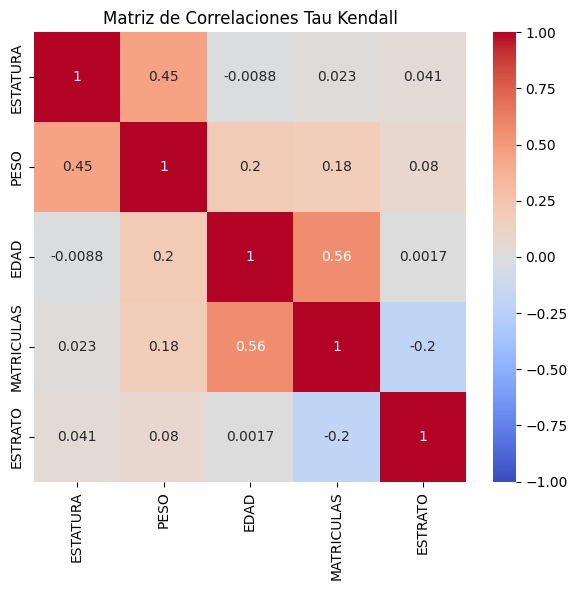

In [6]:
# Kendall Tau
# Matriz de correlaciones de Kendall
corr_kendall = df.loc[:,["ESTATURA", "PESO", "EDAD", "MATRICULAS", "ESTRATO"]].corr(method='kendall')

# Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlaciones Tau Kendall")
plt.tight_layout()
plt.show()

In [7]:
############
# V cramer #
############

# Tabla de contingencia
tabla = pd.crosstab(df['ESTRATO'], df['PROGRAMA'])

# Estadístico chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

# Cálculo de V de Cramér
n = tabla.sum().sum()
min_dim = min(tabla.shape) - 1
v_cramer = np.sqrt(chi2 / (n * min_dim))

print(f"V de Cramér: {v_cramer:.3f}")

V de Cramér: 0.256


In [8]:
tabla

PROGRAMA,ADMINISTRACION,CONTADURIA PUBLICA,ECONOMIA
ESTRATO,,,
1,3,1,1
2,4,5,8
3,12,10,17
4,8,0,7
5,1,0,1
6,1,0,0
